# User Experience Analytics

In [1]:
import os
import sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [3]:
# Load the cleaned xdr data into a DataFrame
data = pd.read_csv('../Data/data/xdr_cleaned.csv', index_col=0)

Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):

- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput


In [4]:
# Import the module class from scripts module
from experience_analytics import ExperienceAnalytics

# Create instance of the class object
analytics = ExperienceAnalytics(data)

In [5]:
# Aggregate user experience
user_agg = analytics.aggregate_user_experience()
# Display result
user_agg.head()

,MSISDN/Number,Handset Type,TCP Retransmission,RTT,Throughput
0,3.361370e+10,Samsung Galaxy A5 Sm-A520F,1.555536e+07,38.722068,4274.587591
1,3.361370e+10,Apple iPhone 8 (A1905),1.325977e+07,39.000000,13027.750000
2,3.361370e+10,undefined,2.180247e+07,29.250000,85.000000
3,3.361370e+10,Apple iPhone Se (A1723),2.180247e+07,12.000000,40.000000
4,3.361370e+10,Apple iPhone 7 (A1778),2.180247e+07,19.500000,48.500000


Task 3.2 - Compute & list 10 of the top, bottom, and most frequent:

- TCP values in the dataset. 
- RTT values in the dataset.
- Throughput values in the dataset.


In [6]:
# TCP Retransmission
top_10, bottom_10, most_frequent = analytics.get_top_bottom_most_frequent(column='TCP Retransmission')
print(f'Top 10 TCP Values:\n{top_10}')
print(f'Bottom 10 of TCP Values:\n {bottom_10}')
print(f'Most frequent of TCP Values:\n {most_frequent}')


Top 10 TCP Values:
2     2.180247e+07
3     2.180247e+07
4     2.180247e+07
7     2.180247e+07
8     2.180247e+07
11    2.180247e+07
12    2.180247e+07
15    2.180247e+07
17    2.180247e+07
19    2.180247e+07
Name: TCP Retransmission, dtype: float64
Bottom 10 of TCP Values:
 23      6195.75
26      6195.75
409     6195.75
450     6195.75
485     6195.75
684     6195.75
758     6195.75
1272    6195.75
1314    6195.75
1388    6195.75
Name: TCP Retransmission, dtype: float64
Most frequent of TCP Values:
 0    2.180247e+07
Name: TCP Retransmission, dtype: float64


Task 3.3 - Compute & report:

The distribution of the average throughput per handset type and provide interpretation for your findings.

The average TCP retransmission view per handset type and provide interpretation for your findings.


In [7]:
# Average throughput per handset type
analytics.avg_throughput_per_handset()

,Handset Type,Avg_Throughput
0,A-Link Telecom I. Cubot A5,11755.000000
1,A-Link Telecom I. Cubot Note Plus,3349.500000
2,A-Link Telecom I. Cubot Note S,4468.500000
3,A-Link Telecom I. Cubot Nova,28108.500000
4,A-Link Telecom I. Cubot Power,31470.750000
...,...,...
1385,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,35.000000
1386,Zyxel Communicat. Lte7460,25161.000000
1387,Zyxel Communicat. Sbg3600,36590.250000
1388,Zyxel Communicat. Zyxel Wah7706,1086.500000


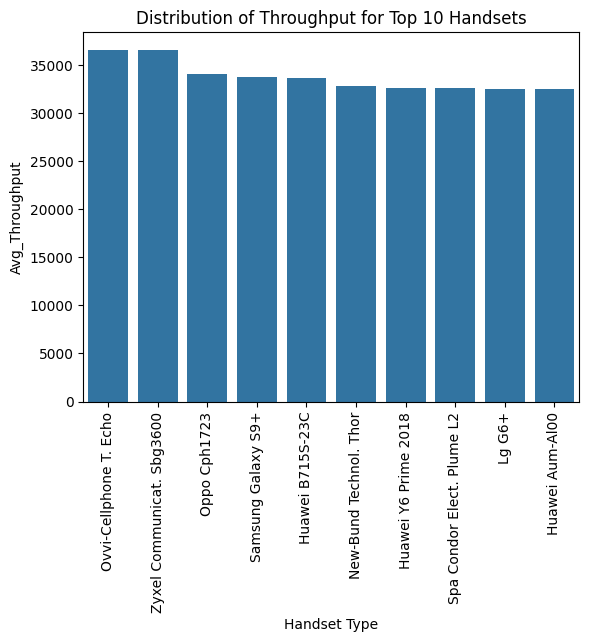

In [8]:
# Average througput per top 10 handset
analytics.plot_distribution(metric='Throughput')


In [9]:
# Average tcp retransmission per handset type
analytics.avg_tcp_rtt_per_handset()

,Handset Type,TCP_Retransmission
0,A-Link Telecom I. Cubot A5,2.180247e+07
1,A-Link Telecom I. Cubot Note Plus,6.162130e+05
2,A-Link Telecom I. Cubot Note S,2.109784e+07
3,A-Link Telecom I. Cubot Nova,1.375752e+05
4,A-Link Telecom I. Cubot Power,9.534250e+03
...,...,...
1385,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,1.128940e+07
1386,Zyxel Communicat. Lte7460,2.180247e+07
1387,Zyxel Communicat. Sbg3600,2.180247e+07
1388,Zyxel Communicat. Zyxel Wah7706,7.763425e+05


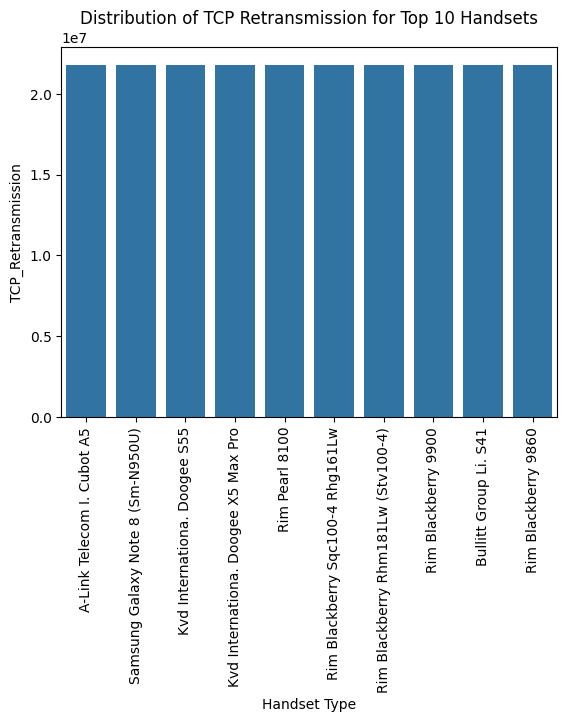

In [10]:
# Average TCP Retransmission per top 10 handset
analytics.plot_distribution(metric='TCP Retransmission')

Task 3.4: K-means clustering to segment users into experience groups

In [11]:
# Describe each cluster based on the cluster centers
# Define the features to be used for clustering
features = ['TCP Retransmission', 'RTT', 'Throughput']
# Perform clustering
clustered_df, cluster_centers = analytics.k_means_clustering(features, 3)
descriptions = {}
for i in range(3):
    center = cluster_centers[cluster_centers['Cluster'] == i].iloc[0]
    descriptions[f'Cluster {i}'] = center

pd.DataFrame(descriptions)

,Cluster 0,Cluster 1,Cluster 2
TCP Retransmission,1.688510e+07,4.820315e+06,2.068276e+07
RTT,7.446995e+01,3.875327e+01,2.265316e+01
Throughput,2.228313e+03,1.642734e+04,8.837455e+02
Cluster,0.000000e+00,1.000000e+00,2.000000e+00


Text(0.5, 1.0, 'K-Means Clustering Results')

/home/noh/10Academy/10academy-aim-week2-challenge/.venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


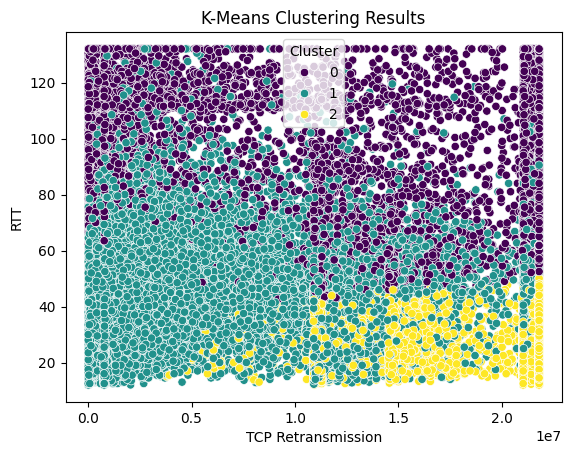

In [16]:
# Plot the clustering result
fig, ax = plt.subplots()
sn.scatterplot(data=clustered_df, x=features[0], y=features[1], hue='Cluster', palette='viridis', ax=ax)
ax.set_title('K-Means Clustering Results')

Cluster 0: High TCP retransmission and high RTT indicate a network with significant instability and average data transfer speeds.

Cluster 1: Low TCP retransmission and moderate RTT combined with very high throughput suggest an excellent network experience with fast data speeds and stability.

Cluster 2: Very high TCP retransmission and low throughput, despite low RTT, point to severe network issues and slow data speeds.

Overall: Clusters highlights that varying network quality, from superior performance in Cluster 1 to problematic conditions with high retransmissions in Clusters 0 and 2.